##  Model by Machine learning algorithm

In [61]:
# -- coding: utf-8 --
# Using SVM and Naive_Bayes as the classifier
import sys
import os
import numpy as np
from time import time
import pandas as pd


# Use scikit-learn to do the vectorization

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import naive_bayes

# Just for reporting purposes
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [14]:
data_dir = "/Users/Yujiao/Desktop/twitter_Ikea/Data/faceData_0918.csv"
dat = pd.read_csv(data_dir)

We extract the tweets in Swedish with obvious emoticon where tweets texts are input and emoticon as output variable. Emoticon include two categories: positive  and nagetive  as following table. The size of training data and testing data are 23169 and 7724. The positive and negative are separate 22762 and 8131 records. 

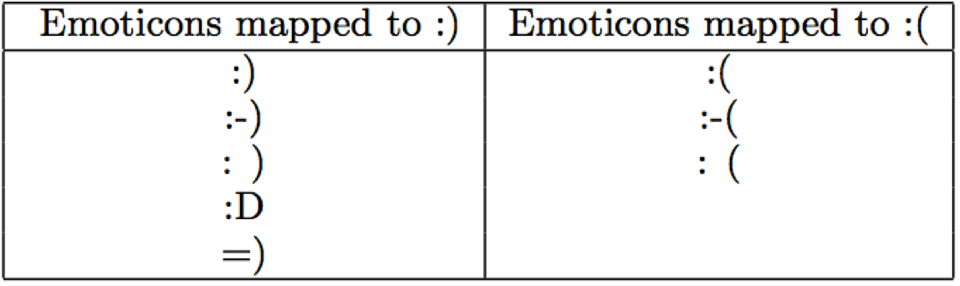

There are previous source of 417 Swedish stop words which are applied here. We will use TF-IDF to process the data in advance. In information retrieval, tf–idf, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.It is often used as a weighting factor in information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document, but is often offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Nowadays, tf-idf is one of the most popular term-weighting schemes. We also tested One-gram and two gram model which shows that one-gram performs better in our case

In [38]:
stopset = pd.read_csv("https://raw.githubusercontent.com/stopwords-iso/stopwords-sv/master/stopwords-sv.txt", 
                      header=0, encoding='utf-8')['aderton']#idx = 150 # Some random index between 0, 199
stoplist = stopset.tolist()
vectorizer = TfidfVectorizer(min_df=5,      # Ignore terms that have a document frequency strictly lower than the given threshold
                             max_df = 0.8,  # Ignore terms that have a document frequency strictly higher than the given threshold
                             sublinear_tf=True, 
                             stop_words = stoplist, 
                             ngram_range=(1, 1),
                             use_idf=True)  # Enable inverse-document-frequency reweighting

X = vectorizer.fit_transform(dat['tweet_text'])
y = dat['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)


In [39]:
print "Swedish stop words: "
print stopset.apply(unicode)[:10]
print ("-"*30)
print ("\nTrain data size: %d, \nTest data size: %d," % (X_train.shape[0],X_test.shape[0]))
print ("Vocabulary length: %d." % len(vectorizer.vocabulary_))


Swedish stop words: 
0    adertonde
1         adjö
2       aldrig
3         alla
4        allas
5         allt
6       alltid
7       alltså
8        andra
9       andras
Name: aderton, dtype: object
------------------------------

Train data size: 23169, 
Test data size: 7724,
Vocabulary length: 4853.


In [211]:
len(stopset) #417

417

### SVM classification

In machine learning, support vector machine (SVM) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. Hereby, we apply this approach with linear kernel to fit sentiment analysis model.

In [46]:
# use SVM to classify
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_prediction_SCM = classifier.predict(X_test)


In [47]:
# Check classification performance
# Print classification results as a report
print("SVM Classification 2_gram Results:")
print("Training time: %.3fs; Prediction time: %.3fs" % (time_train, time_predict))
print("-"*55)
print(classification_report(y_test, y_prediction_SCM))
print("="*55)

SVM Classification 2_gram Results:
Training time: 17.275s; Prediction time: 1.843s
-------------------------------------------------------
             precision    recall  f1-score   support

          0       0.78      0.39      0.52      2076
          1       0.81      0.96      0.88      5648

avg / total       0.80      0.81      0.78      7724



It turns out that SVM provide 0.78 accuracy rate for negative tweets predition and 0.82 accuracy rate for positive tweets.

### Naive bayes classification

In [48]:
#naive bayes classification
NB = naive_bayes.MultinomialNB()
NB.fit(X_train, y_train)
y_predict_bayes = NB.predict(X_test)

print "Naive bayes 2_gram Classification Results:"
print "-"*55
print(classification_report(y_test, y_predict_bayes))
print "="*55

Naive bayes 2_gram Classification Results:
-------------------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.35      0.49      2076
          1       0.80      0.97      0.88      5648

avg / total       0.81      0.80      0.77      7724



Naive Bayes method can have better prediction than SVM. It provides 0.82 accuracy rate for negative tweets predition and 0.80 accuracy rate for positive tweets. 

In [49]:
roc_auc_score(y_test, NB.predict_proba(X_test)[:,1])

0.80899030877641143

### Logistic regression

In [44]:
#logistic regression
from sklearn.linear_model import LogisticRegression
    
log_model = LogisticRegression()
log_model = log_model.fit(X=X_train, y=y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.81      0.35      0.49      2076
          1       0.80      0.97      0.88      5648

avg / total       0.80      0.80      0.77      7724



Above analysis are preliminary results applying SCM, naïve Bayes and logistic regression. In each, both 1-gram and 2-gram language model are considered as well. It concludes that Naive bayes model perform the best. In next section, we will apply Naive bayes model to our IKEA data in Stockholm to analyse how people's opinion changes as time goes.

## Prediction of Stockholm resident opinion on IKEA

We will apply above model to our IKEA twitter data in Swedish. The prediction of opinion according to people's twees shows that postive opinions are major part. Especially, new IKEA-entry on September 1, 2007 boost peoples mood very significantly.

In [89]:
path = "/Users/Yujiao/Desktop/twitter_Ikea/Data/IKEA_database/"
Stockholm_data = pd.read_csv(path + "stockholm.csv")

(30893, 10)
(1422, 10)


In [212]:
dat.head(3)

,user_id,user_location,tweet_text,tweet_created_at,tweet_retweet_count,user_statuses_count,user_followers_count,user_friends_count,tweet_place,class
0,4.202075e+08,Stockholm,När jag tog kortet var magen cm från ratten ...,2017-09-14 09:54:46,0,19432,724,497,NaN,1
1,6.196030e+05,"Stockholm, Sweden",Jag använder Piwik på,2017-09-14 09:54:35,0,22681,10433,2346,NaN,1
2,2.258524e+09,Swedenland,Äntligen Superbra avsnitt,2017-09-14 09:54:05,0,1472,116,312,NaN,1


In [213]:
finalData=dat.append(Stockholm_data)
X.f = vectorizer.fit_transform(finalData['tweet_text'])
y.f = finalData['class']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)

In [114]:
print finalData.shape
print X.shape
print dat.shape
print Stockholm_data.shape

(32315, 11)
(32315, 5333)
(30893, 10)
(1422, 10)


Note that we append IKEA data into emoji training data so as that both of them have same corpus dimenstion. But only emoji data are trained and IKEA data are used as predicted dataset. That is the reason why we split data as below based on their individual size.

In [115]:
X_train.f = X.f[0:30892,]
y_train.f = y.f[0:30892]
X_test.f = X.f[30893:32315,]

In [116]:
NB.fit(X_train.f, y_train.f)
y_predict_bayes = NB.predict(X_test.f)

In [120]:
Stockholm_data_final = pd.concat([Stockholm_data, pd.DataFrame(y_predict_bayes)], axis=1)

In [124]:
mood=Stockholm_data_final.iloc[:,10]
pd.value_counts(mood).reset_index()

,index,0
0,1.0,1121
1,0.0,301


Positive tweet counts are 1121 while negative one are 301. This tell us that Swedish people are quite positive about IKEA. Then we check how the count of negative twitter change as time goes, and then same for postive tweets.

In [158]:
negative=Stockholm_data_final[Stockholm_data_final.iloc[:,10]==0]
positive=Stockholm_data_final[Stockholm_data_final.iloc[:,10]==1]

negative = negative.sort_values('tweet_created_at')
positive = positive.sort_values('tweet_created_at')

In [206]:
negTrend=pd.value_counts(negative.tweet_created_at).reset_index()
negTrend=negTrend.sort_values("index")

posTrend=pd.value_counts(positive.tweet_created_at).reset_index()
posTrend=posTrend.sort_values("index")

In [210]:
posTrend.head(10)

,index,tweet_created_at
35,2017-08-24,3
32,2017-08-25,10
29,2017-08-26,15
24,2017-08-27,18
34,2017-08-28,5
13,2017-08-29,31
23,2017-08-30,18
8,2017-08-31,48
7,2017-09-01,49
6,2017-09-02,52


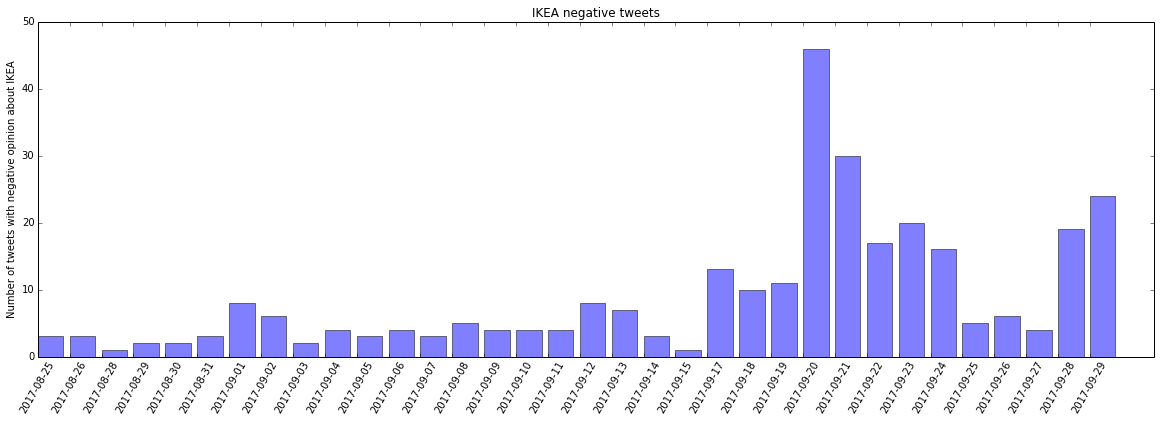

In [208]:
y_pos = np.arange(len(negTrend.index))
performance = negTrend.tweet_created_at  
place = [str(x) for x in negTrend.iloc[0:,0]]
 
plt.bar(y_pos, performance,alpha=0.5)
plt.xticks(y_pos,place)
plt.xticks(rotation=60)
plt.ylabel('Number of tweets with negative opinion about IKEA')
plt.title('IKEA negative tweets')


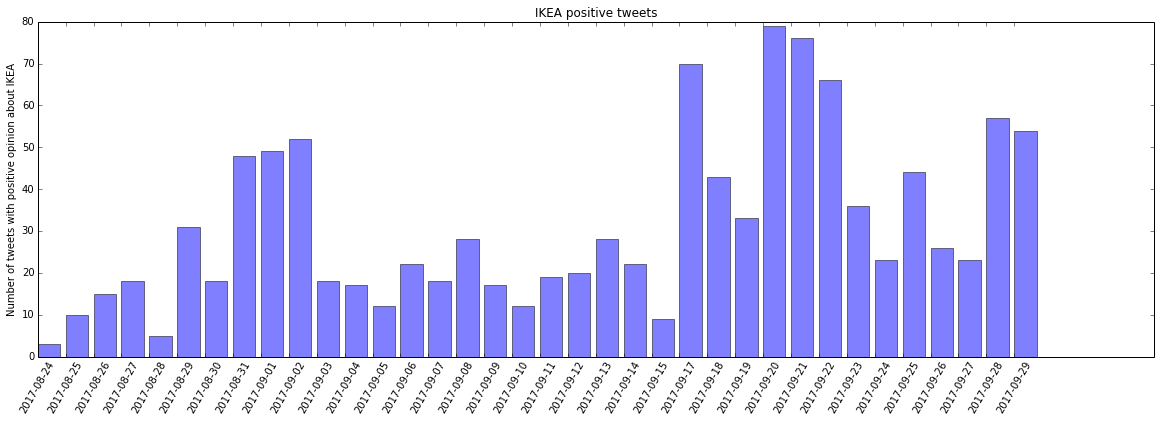

In [209]:
y_pos = np.arange(len(posTrend.index))
performance = posTrend.tweet_created_at  
place = [str(x) for x in posTrend.iloc[0:,0]]
 
plt.bar(y_pos, performance,alpha=0.5)
plt.xticks(y_pos,place)
plt.xticks(rotation=60)
plt.ylabel('Number of tweets with positive opinion about IKEA')
plt.title('IKEA positive tweets')


Above figure shows that new IKEA entry (2017-09-01) make people post more positive tweets but negative tweets do not increase significantly.